In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/Advertising.csv", index_col=0)
data.head(2)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


## Exploratory Data Analysis

In [ ]:
data.shape

(200, 4)

In [ ]:
data.shape

(200, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
from scipy.stats import iqr
iqr(data['sales'])


7.024999999999999

In [ ]:
q1 = data['sales'].quantile(.25)
q3 = data['sales'].quantile(.75)
iqr= q3 - q1
iqr

7.024999999999999

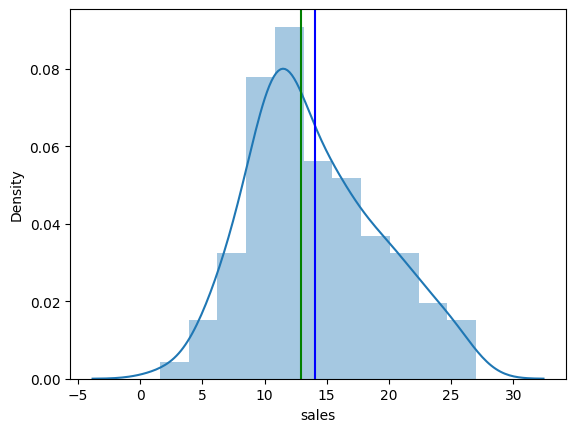

In [ ]:
sns.distplot(data.sales)
plt.axvline(data.sales.mean(), color='b')
# plt.axvline(data.sales.quantile(0.), color='g')
# plt.axvline(data.sales.quantile(.25), color='g')
plt.axvline(data.sales.quantile(.5), color='g')
# plt.axvline(data.sales.quantile(.75), color='g')
# plt.axvline(data.sales.quantile(1.), color='g')
plt.show()

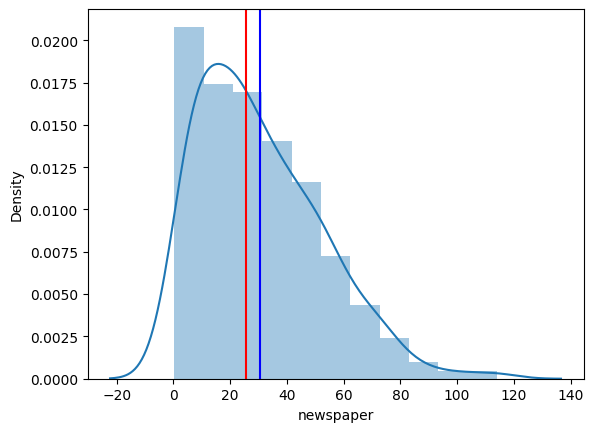

In [ ]:
sns.distplot(data.newspaper)
plt.axvline(data.newspaper.mean(), color='b')
plt.axvline(data.newspaper.median(), color='r')
plt.show()

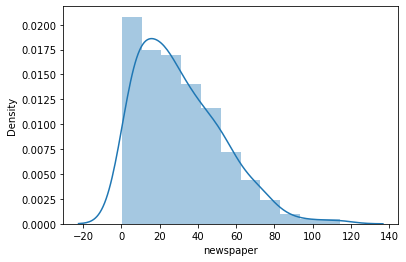

In [ ]:
sns.distplot(data.newspaper);

>Sales seems to be normally distributed.

>Spend of Newspaper is right skewed.

>TV and Radio are normally distributed.

In [ ]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
sns.jointplot("newspaper","sales",data=data,kind='reg');

TypeError: ignored

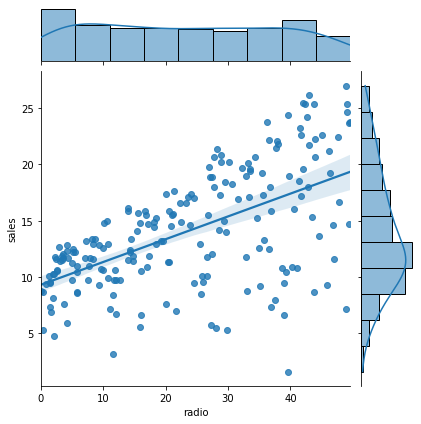

In [ ]:
sns.jointplot("radio","sales",data=data, kind='reg');

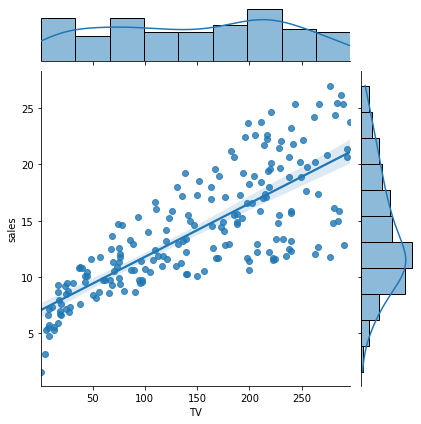

In [ ]:
sns.jointplot("TV","sales",data=data, kind='reg');

>TV is most important for predicting Sales.

>Radio is less important for predicting Sales.

>Newspaper is least important/not important for predicting Sales.

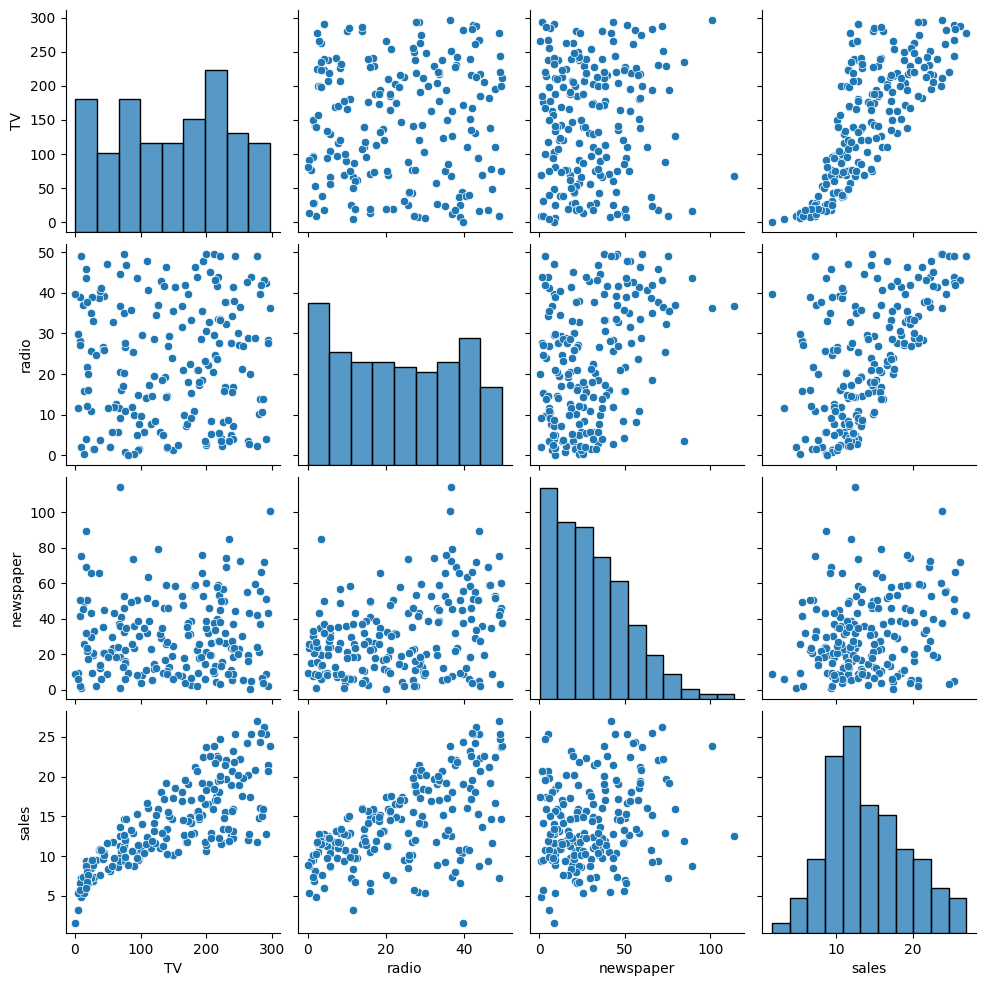

In [ ]:
sns.pairplot(data, aspect=1);

__We always want a high correlation between Independent Variable and Dependent Variable. The more high it is, the better is the feature for predicting the Target Variable.__


__However, there must be least correlation between any two Independent variables. If any independent variables have high positive or high negative correlation, then it leads to a major issue in ML which is called MULTICOLLINEARITY.__

__If we find two Independent variables with high positive or high negative correlation, then we remove any one of the Independent variable.__

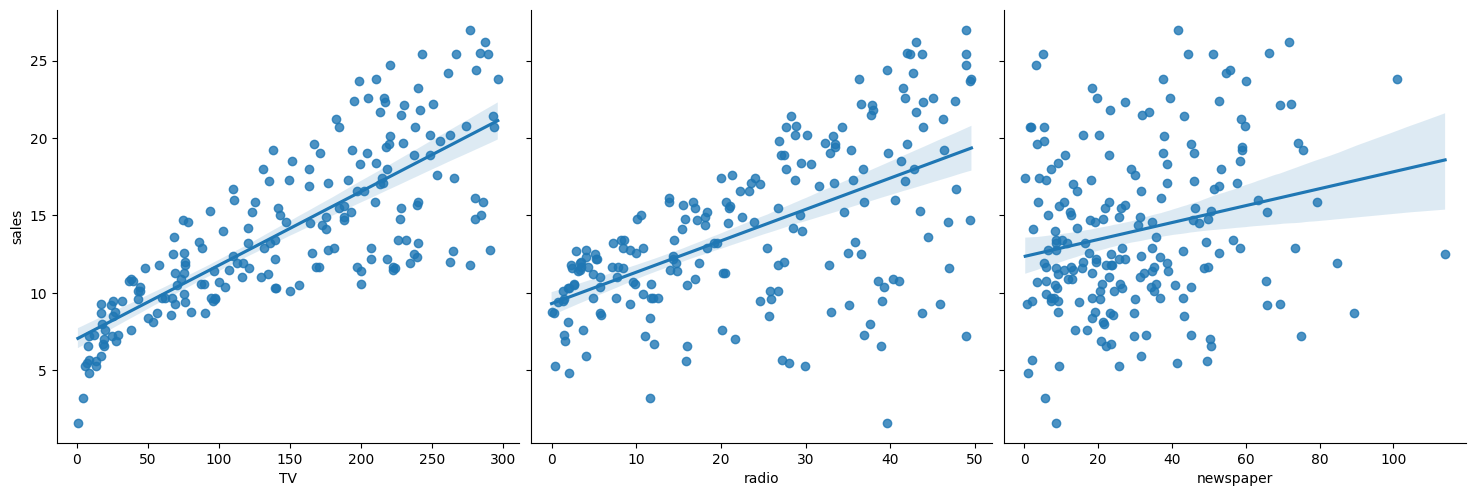

In [ ]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=5, aspect=1, kind='reg');

In [ ]:
cor = data.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


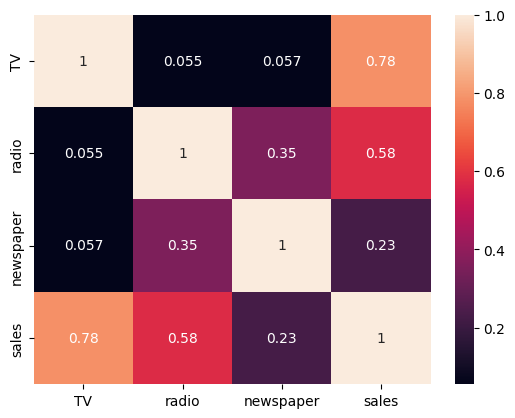

In [ ]:
sns.heatmap(cor, annot=True);

# Data Preparation

In [ ]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
X = data.iloc[:,:-1]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [ ]:
y = data.iloc[:,-1]
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [ ]:
X.shape

(200, 3)

In [ ]:
print(y.shape,y.ndim)

(200,) 1


In [ ]:
# Not a part of Linear Regression

import random
print(random.random())

0.8758060021645655


In [ ]:
# Not a part of Linear Regression
for i in range(20):
    #random.seed(10)
    print(random.random(), end=" | ")

0.2242989686860415 | 0.41287020771484073 | 0.03692486905862902 | 0.4966034986165482 | 0.8179828644296319 | 0.6578909387591091 | 0.5334837356527721 | 0.8551257407736 | 0.14968813497140154 | 0.5672354768631239 | 0.3741748177480889 | 0.6013045471136395 | 0.11291570189443623 | 0.7755127010728279 | 0.09660583318435267 | 0.16636374579324753 | 0.8074497520247557 | 0.9476939242234907 | 0.4332315025514858 | 0.41408083174830124 | 

In [ ]:
# Not a part of Linear Regression

import random
random.seed(0)
print(random.random())

0.8444218515250481


In [ ]:
# Not a part of Linear Regression

import random
random.seed(11)
print(random.random())

0.4523795535098186


In [ ]:
# Not a part of Linear Regression

import random
random.seed(1001)
print(random.random())

0.7966509679599704


In [ ]:
# Not a part of Linear Regression

import random
random.seed(5)
print(random.random())

0.6229016948897019


In [ ]:
X.shape

(200, 3)

In [ ]:
y.shape

(200,)

## Splitting X  and y into training and testing data

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
# It is good to have train size atleast twice that of test size

In [ ]:
X_train.shape

(160, 3)

In [ ]:
X_test.shape

(40, 3)

In [ ]:
print(y_train.shape,y_train.ndim)

(160,) 1


In [ ]:
y_test.shape

(40,)

In [ ]:
X_train.head()

,TV,radio,newspaper
135,36.9,38.6,65.6
67,31.5,24.6,2.2
27,142.9,29.3,12.6
114,209.6,20.6,10.7
169,215.4,23.6,57.6


In [ ]:
X_test.head()

,TV,radio,newspaper
19,69.2,20.5,18.3
171,50.0,11.6,18.4
108,90.4,0.3,23.2
99,289.7,42.3,51.2
178,170.2,7.8,35.2


In [ ]:
X_train.tail()

,TV,radio,newspaper
68,139.3,14.5,10.2
193,17.2,4.1,31.6
118,76.4,0.8,14.8
48,239.9,41.5,18.5
173,19.6,20.1,17.0


In [ ]:
y_train

135    10.8
67      9.5
27     15.0
114    15.9
169    17.1
       ... 
68     13.4
193     5.9
118     9.4
48     23.2
173     7.6
Name: sales, Length: 160, dtype: float64

In [ ]:
X_train.describe()

,TV,radio,newspaper
count,160.000000,160.000000,160.000000
mean,150.518125,23.388125,30.125625
std,84.957371,14.736240,21.444814
min,4.100000,0.000000,0.900000
25%,76.375000,9.525000,11.675000
50%,157.400000,24.300000,25.900000
75%,220.350000,36.350000,45.100000
max,296.400000,49.600000,100.900000


# Standardization/Scaling

There are many ways of scaling the data, however, the following 3 are very popular in the industry stated below in the order of their importance:

>1. Standard Scaling

>2. Min-Max Scaling

>3. Robust Scaling


Below cells are not a part of Linear Regression. They help us understand the concept the Scaling and it is very important for every ML algorithm to be supplied with scaled data.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Standard Scaling

![Standard Scaling](https://miro.medium.com/max/866/1*qXXqcZXhSTgw9tVhx7zNNw.gif "Standard Scaling")

Because, Standard Scaling is the z-score, it gets the column converted to Normal Distribution.

# Min-Max Scaling

![Min-Max Scaling](https://media.geeksforgeeks.org/wp-content/uploads/min-max-normalisation.jpg "Min-Max Scaling")

# Robust Scaling

![Robust Scaling](https://media.geeksforgeeks.org/wp-content/uploads/20200624151526/for4.png "Robust Scaling")

![Scaling](https://miro.medium.com/max/2456/1*A9d4SEX0t_bAAPzZeVqwAQ.png "Scaling")

# Linear Regression Continues...

In [ ]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TV', 'radio', 'newspaper']] = scaler.fit_transform(X_train[['TV', 'radio', 'newspaper']])
X_train.head()

,TV,radio,newspaper
135,-1.341553,1.035518,1.659411
67,-1.405314,0.082496,-1.306297
27,-0.089952,0.402439,-0.819809
114,0.697613,-0.189796,-0.908687
169,0.766097,0.014423,1.285189


In [ ]:
X_train.describe()

,TV,radio,newspaper
count,1.600000e+02,1.600000e+02,1.600000e+02
mean,2.498002e-17,-1.670539e-16,-1.047773e-16
std,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.728842e+00,-1.592099e+00,-1.367108e+00
25%,-8.754498e-01,-9.437042e-01,-8.630784e-01
50%,8.125819e-02,6.207404e-02,-1.976652e-01
75%,8.245444e-01,8.823534e-01,7.004673e-01
max,1.722510e+00,1.784320e+00,3.310665e+00


In [ ]:
X_test.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [ ]:
X_test[['TV', 'radio', 'newspaper']] = scaler.transform(X_test[['TV', 'radio', 'newspaper']])
X_test.head()

,TV,radio,newspaper
19,-0.960169,-0.196603,-0.553176
171,-1.186874,-0.802453,-0.548498
108,-0.709849,-1.571677,-0.323965
99,1.643399,1.287388,0.985811
178,0.232395,-1.061130,0.237368


# Modeling using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor

LinearRegression()

In [ ]:
# y = mx + c
# Intercept c
regressor.intercept_

14.217500000000001

In [ ]:
# y = mx + c
# Slope
regressor.coef_

array([ 3.77588591,  2.88656448, -0.05946128])

In [ ]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

If we look, the coefficient values of the IVs are as follows:

>TV i.e. m1 =3.77588591

>Radio i.e. m2 = 2.88656448

>Newspaper i.e. m3 = -0.05946128

__If we observe carefully, TV has the highest coefficient value and Newspaper has the lowest. This means that as per Linear Regression, TV is the most important predictor and Newspaper is the least important predictor.__

### TV > Radio > Newspaper

In [ ]:
# y = m1*x1 + m2*x2 + m3*x3 + c
# y = 3.77588591*x1 + 2.88656448*x2 + (-0.05946128)*x3 + 14.217500000000001

In [ ]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [ ]:
#print(y_test)

In [ ]:
y_pred_train = regressor.predict(X_train)
#y_pred_train

In [ ]:
y_train

135    10.8
67      9.5
27     15.0
114    15.9
169    17.1
       ... 
68     13.4
193     5.9
118     9.4
48     23.2
173     7.6
Name: sales, Length: 160, dtype: float64

In [ ]:
X_test.tail()

,TV,radio,newspaper
190,-1.556451,-0.768416,-0.314609
130,-1.073522,-0.775224,0.606912
5,0.357555,-0.856911,1.322611
84,-0.969615,1.437148,0.256079
107,-1.482063,-0.843297,-0.019910


In [ ]:
y_pred_test

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

# Compute how good is out model.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print(MAE_train," ",MAE_test)

1.2131871622729427   1.361781350209028


In [ ]:
#MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
#print(MSE_train," ",MSE_test)
print(MSE_test)

4.402118291449684


In [ ]:
#RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE_test)
#print(RMSE_train," ",RMSE_test)

2.09812256349568


In [ ]:
#R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(R2_test)
#print(R2_train," ",R2_test)

0.8601145185017869


In [ ]:
X_train.shape

(160, 3)

In [ ]:
n = X_train.shape[0]
p = X_train.shape[1]
print(n,p)

160 3


num = (1-R2_train)*(n-1)
den = n-p-1
AR2_train = 1-(num/den)
AR2_train

In [ ]:
X_test.shape

(40, 3)

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
print(n,p)

40 3


In [ ]:
num = (1-R2_test)*(n-1)
den = n-p-1
AR2_test = 1-(num/den)
AR2_test

0.8484573950436025

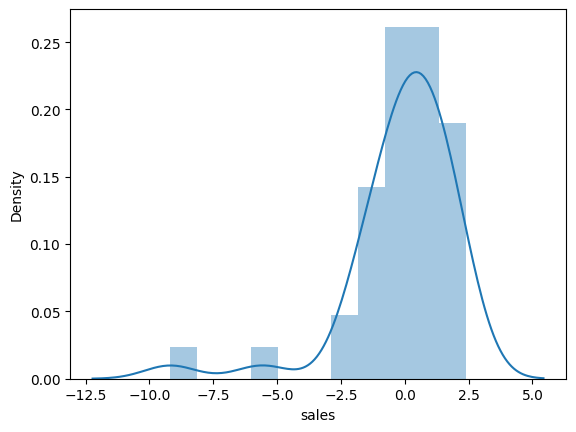

In [ ]:
import seaborn as sns
sns.distplot(y_test-y_pred_test)
plt.show()

# Modeling with a new model using Linear Regression

In [ ]:
X_train.head()

,TV,radio,newspaper
135,-1.341553,1.035518,1.659411
67,-1.405314,0.082496,-1.306297
27,-0.089952,0.402439,-0.819809
114,0.697613,-0.189796,-0.908687
169,0.766097,0.014423,1.285189


In [ ]:
X_train.drop(['newspaper'], axis=1, inplace=True)

In [ ]:
X_test.drop(['newspaper'], axis=1, inplace=True)

In [ ]:
X_train.head()

,TV,radio
135,-1.341553,1.035518
67,-1.405314,0.082496
27,-0.089952,0.402439
114,0.697613,-0.189796
169,0.766097,0.014423


In [ ]:
X_test.head()

,TV,radio
19,-0.960169,-0.196603
171,-1.186874,-0.802453
108,-0.709849,-1.571677
99,1.643399,1.287388
178,0.232395,-1.061130


In [ ]:
X_test.head()

LinearRegression()

In [ ]:
regressor2

LinearRegression()

In [ ]:
# y = mx + c
# Intercept c
regressor2.intercept_

14.217500000000001

In [ ]:
# y = mx + c
# Slope
regressor2.coef_

array([3.77015841, 2.86761977])

In [ ]:
X_train.columns

In [ ]:
y_pred_test = regressor2.predict(X_test)
y_pred_test

array([10.03372704,  7.44166635,  7.03428485, 24.10511311, 12.05074854,
        6.56594425, 12.88437578, 15.06484066, 10.86271103, 16.29621257,
       22.91893053,  9.13671762, 10.43024707, 15.43049562, 11.56453101,
       12.12837638, 18.67914279, 10.71281572, 15.92006138, 17.2533412 ,
       24.14827388,  9.56798468, 15.13842781, 12.406066  ,  5.72348257,
       15.18558508, 12.27542944, 20.88115543, 13.39161043,  9.08563268,
       13.11424341, 21.44899731, 18.1605751 , 21.12893441,  6.64285498,
        6.14590697,  7.94710668, 13.10824453, 14.6830918 ,  6.21163209])

In [ ]:
#print(y_test)

In [ ]:
y_pred_train = regressor2.predict(X_train)
#y_pred_train

In [ ]:
#y_train

In [ ]:
X_test.tail()

,TV,radio
190,-1.556451,-0.768416
130,-1.073522,-0.775224
5,0.357555,-0.856911
84,-0.969615,1.437148
107,-1.482063,-0.843297


In [ ]:
y_pred_test

array([10.03372704,  7.44166635,  7.03428485, 24.10511311, 12.05074854,
        6.56594425, 12.88437578, 15.06484066, 10.86271103, 16.29621257,
       22.91893053,  9.13671762, 10.43024707, 15.43049562, 11.56453101,
       12.12837638, 18.67914279, 10.71281572, 15.92006138, 17.2533412 ,
       24.14827388,  9.56798468, 15.13842781, 12.406066  ,  5.72348257,
       15.18558508, 12.27542944, 20.88115543, 13.39161043,  9.08563268,
       13.11424341, 21.44899731, 18.1605751 , 21.12893441,  6.64285498,
        6.14590697,  7.94710668, 13.10824453, 14.6830918 ,  6.21163209])

# Compute how good is out model.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(R2_train," ",R2_test)

0.906590009997456   0.860454166318657


In [ ]:
X_train.shape

(160, 2)

In [ ]:
n = X_train.shape[0]
p = X_train.shape[1]
print(n,p)

160 2


In [ ]:
num = (1-R2_train)*(n-1)
den = n-p-1
AR2_train = 1-(num/den)
AR2_train

0.9054000738190796

In [ ]:
X_test.shape

(40, 2)

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
print(n,p)

40 2


In [ ]:
num = (1-R2_test)*(n-1)
den = n-p-1
AR2_test = 1-(num/den)
AR2_test

0.8529111482818277

## Here you go

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=15)
# It is good to have train size atleast twice that of test size

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#scaler = StandardScaler()
#scaler = RobustScaler()
scaler = MinMaxScaler()
X_train[['TV', 'radio', 'newspaper']] = scaler.fit_transform(X_train[['TV', 'radio', 'newspaper']])
X_test[['TV', 'radio', 'newspaper']] = scaler.transform(X_test[['TV', 'radio', 'newspaper']])

In [ ]:
## drop c3 - It has low coeffecient value
X_train.drop(['newspaper'], axis=1, inplace=True)
X_test.drop(['newspaper'], axis=1, inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor2.intercept_)
print(regressor2.coef_)


2.9144301826438106
[13.78104435  9.10564528]


In [ ]:
y_pred_test = regressor2.predict(X_test)
y_pred_train = regressor2.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE_test = mean_absolute_error(y_test, y_pred_test)
MAE_tr = mean_absolute_error(y_train, y_pred_train)
MSE_tr = mean_squared_error(y_train, y_pred_train)
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
RMSE_tr = np.sqrt(mean_squared_error(y_train, y_pred_train))
R2_test = r2_score(y_test, y_pred_test)
R2_tr = r2_score(y_train, y_pred_train)
print('RMSE-test',RMSE_test)
print('RMSE-train',RMSE_tr)
print('R2_test',R2_test)
print('R2_tr',R2_tr)

RMSE-test 1.575795960021901
RMSE-train 1.6872155059158822
R2_test 0.9202538232418309
R2_test 0.891958415182157


In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
print(n,p)


30 2


In [ ]:
num = (1-R2_test)*(n-1)
den = n-p-1
AR2_test = 1-(num/den)
AR2_test

0.9143466990375221

In [ ]:
n = X_train.shape[0]
p = X_train.shape[1]
print(n,p)


170 2


In [ ]:
num = (1-R2_tr)*(n-1)
den = n-p-1
AR2_test = 1-(num/den)
AR2_test

0.8906645039867338

# End of Linear Regression

# Task for the weekend

Perform atleast 10-15 experiments and formulate all the results of Adjusted R2 score in an excel sheet and let me know on Tuesday which combination of parameters worked best for you.

The best one will be the one which has the highest value of Ar2 on Test dataset.

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [ ]:
tx=sns.load_dataset('taxis')
tx.head(2)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan


In [ ]:
tx.color.value_counts()

yellow    5451
green      982
Name: color, dtype: int64

In [ ]:
y